In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import make_scorer


In [30]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8b4274214ab849948850a0e69bfb9cb9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='A1p_ir3Em-3axihM70lcpQzz8oYFpl7l1Ao2AoyiGkSg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8b4274214ab849948850a0e69bfb9cb9.get_object(Bucket='lifetimeexpectancyprediction-donotdelete-pr-gogaqzh008timb',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
life_data = pd.read_csv(body)
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
life_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [32]:
life_data = life_data.drop('Year', axis = 1)
life_data['Country'] = life_data['Country'].astype('category')
life_data['Country'] = life_data['Country'].cat.codes
life_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
life_data['Status'] = life_data['Status'].astype('category')
life_data['Status'] = life_data['Status'].cat.codes
life_data = life_data.groupby('Country').mean()

In [34]:
life_data.columns
life_data.dtypes

Status                                int8
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [35]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [36]:
life_features.isnull().sum()

Status                              0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

In [37]:
life_features.fillna(value = life_features.mean(), inplace = True)

life_labels.fillna(value = life_labels.mean(), inplace = True)

life_features.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
0,1,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,1,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,1,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,1,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,1,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.84375


In [38]:
life_labels.head()

Country
0    58.19375
1    75.15625
2    73.61875
3    49.01875
4    75.05625
Name: Life expectancy , dtype: float64

Text(0, 0.5, 'Life expectancy')

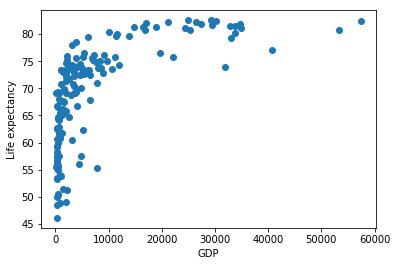

In [39]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

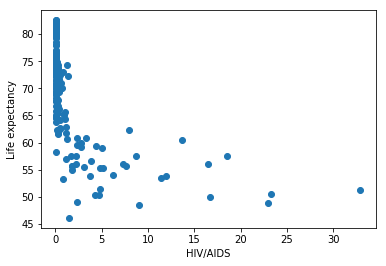

In [40]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

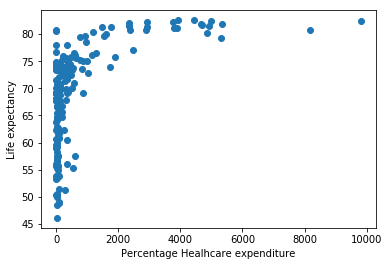

In [41]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

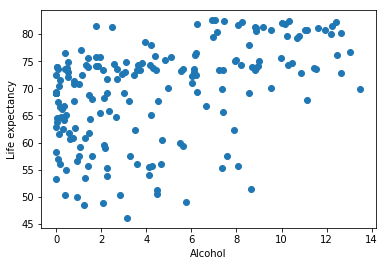

In [42]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

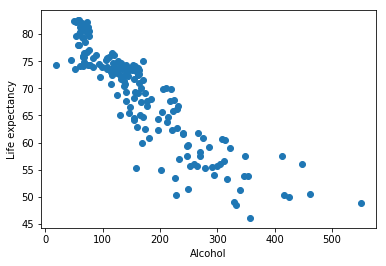

In [43]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

In [44]:
x_train,x_test,y_train,y_test = train_test_split(life_features, life_labels, train_size = 0.8, test_size = 0.2)

In [45]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = reg.predict(x_test)

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
score

0.9009782998358231

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.157190836634002
MSE: 6.615656889513966
RMSE: 2.5720919286670076


In [48]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [49]:
wml_credentials={
 "apikey": "cHD7G3i4cTcbDOdMYlY3WLRizue5ExFO_S0fdVN8WPE8",
  "instance_id": "375936e3-ecf0-4fc9-95b1-631d19a0be7c",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient( wml_credentials )

In [50]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "divyasribarma", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "divyasribarma@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy"}

model_artifact =client.repository.store_model(reg, meta_props=model_props)

In [54]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'bf3dd0f8-ba82-44e4-a1ba-932124566e85'

In [52]:
deployment = client.deployments.create(published_model_uid, name="life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'bf3dd0f8-ba82-44e4-a1ba-932124566e85' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='61031cc1-8285-491c-a8b9-d09db8cbadce'
------------------------------------------------------------------------------------------------




In [53]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/375936e3-ecf0-4fc9-95b1-631d19a0be7c/deployments/61031cc1-8285-491c-a8b9-d09db8cbadce/online'